In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *

In [41]:
G=6.6738e-11 #gravitational constant
Ms=1.989e30 #msun in kg
Me=Ms/10 #need the masses to be pretty close to each other to see any motion of the other object
Rs0=np.array([-1e10,0,0,3e3]) #the sun has some starting velocity probably but not much
Re0=np.array([1.4e11,0,0,-3e4]) #starting coordinates of other planet
h=60*60*24 #1day in seconds
YR=3.154e7 #approximate seconds in a year
state=np.concatenate([Rs0,Re0])

In [49]:
#this is the diffeq that does the effect of body b on a
def fab(ra,rb,t,mb): #where ra is the vector (x,y,vx,vy) for body a and rb is for body b
    dx=rb[0]-ra[0]
    dy=rb[1]-ra[1]
    
    vx=ra[2]
    vy=ra[3]
    
    R=(dx**2+dy**2)**0.5

    ax=G*mb*dx/(R**3)
    ay=G*mb*dy/(R**3)
    
    return np.array([vx,vy,ax,ay],float)

In [51]:
def diffeq(state,t,m1,m2):
    r1=state[0:4]
    r2=state[4:8]

    dr1=fab(r1,r2,t,m2)
    dr2=fab(r2,r1,t,m1)

    return np.concatenate([dr1,dr2])

In [87]:
Ts,Rs=RK4(diffeq,state,Ms,Me,h=h,maxt=YR*3)

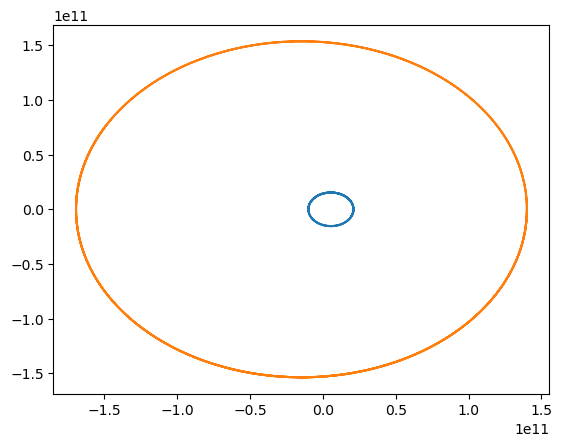

In [77]:
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])

The key insight gained by looking through the ChatGPT version was that my derivative function for one body was correct, but then instead of trying to do each object separately in the RK loop, it made more sense to combine all the positions and velocities for each object into one vector and have another diffeq wrapper that moves each body. Also used it to generate initial conditions that worked to make sure that's not where I was going wrong. Will try other ICs just for fun.

In [89]:
#equal masses now but same initial velocities and positions as before
Ms=1.989e30 #msun in kg
Me=Ms #need the masses to be pretty close to each other to see any motion of the other object
Rs0=np.array([-1e10,0,0,3e3]) #the sun has some starting velocity probably but not much
Re0=np.array([1.4e11,0,0,-3e4]) #starting coordinates of other planet
state=np.concatenate([Rs0,Re0])

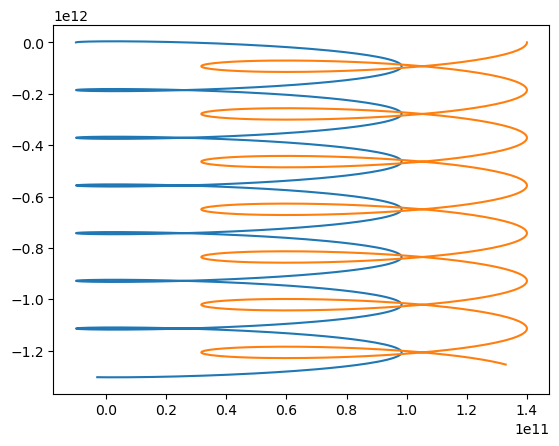

In [91]:
Ts,Rs=RK4(diffeq,state,Ms,Me,h=h,maxt=YR*3)
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])

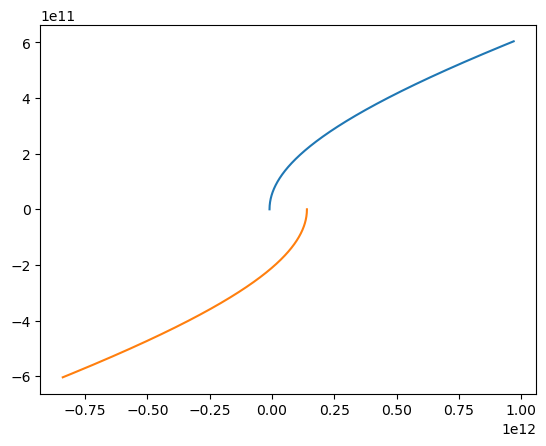

In [99]:
#equal masses and equal initial velocities but same positions as before
Ms=1.989e30 #msun in kg
Me=Ms #need the masses to be pretty close to each other to see any motion of the other object
Rs0=np.array([-1e10,0,0,3e4]) #the sun has some starting velocity probably but not much
Re0=np.array([1.4e11,0,0,-3e4]) #starting coordinates of other planet
state=np.concatenate([Rs0,Re0])
Ts,Rs=RK4(diffeq,state,Ms,Me,h=h,maxt=YR*3)
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])

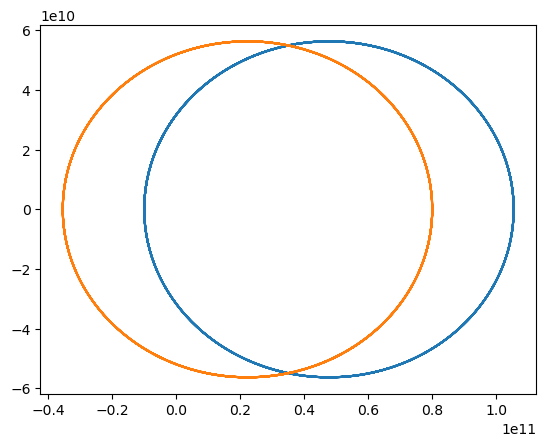

In [125]:
#equal masses and equal initial velocities and equal initial positions
#from 1-3e10, the stars just run away
#4e10 makes them orbit each other like a venn diagram but unstably
#5e10 and above looks stable and the circles move to overlap each other
#7e10 the two orbits switch places and then start to move apart
Ms=1.989e30 #msun in kg
Me=Ms #need the masses to be pretty close to each other to see any motion of the other object
Rs0=np.array([-1e10,0,0,3e4]) #the sun has some starting velocity probably but not much
Re0=np.array([8e10,0,0,-3e4]) #starting coordinates of other planet
state=np.concatenate([Rs0,Re0])
Ts,Rs=RK4(diffeq,state,Ms,Me,h=h,maxt=YR*3)
plt.plot(Rs[:,0],Rs[:,1])
plt.plot(Rs[:,4],Rs[:,5])